In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load cleaned_movies into DataFrame
movies_df = pd.read_csv('movies_final.csv')
movies_df.head()

,Unnamed: 0,name,rating,genre,year,released,score,votes,director,writer,star,country,gross,company,runtime
0,0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,46998772.0,Warner Bros.,146.0
1,1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,58853106.0,Columbia Pictures,104.0
2,2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,538375067.0,Lucasfilm,124.0
3,3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,83453539.0,Paramount Pictures,88.0
4,4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,39846344.0,Orion Pictures,98.0


In [3]:
# Drop Unnamed column
movies_df = movies_df.loc[:,~movies_df.columns.str.contains('^Unnamed')]
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,39846344.0,Orion Pictures,98.0


In [4]:
# Get average IMDb score by genre
score_by_genre = movies_df.groupby(['genre']).mean()['score']
score_by_genre

genre
Action       6.213205
Adventure    6.290453
Animation    6.762236
Biography    7.042191
Comedy       6.199083
Crime        6.681157
Drama        6.695344
Family       6.540000
Fantasy      6.050000
Horror       5.787171
Music        7.200000
Musical      7.900000
Mystery      6.665000
Romance      6.500000
Sci-Fi       6.387500
Sport        5.900000
Thriller     6.025000
Western      5.666667
Name: score, dtype: float64

In [5]:
# Get total number of movies by genre
movies_by_genre = movies_df.groupby(['genre']).count()['name']
movies_by_genre

genre
Action       1666
Adventure     419
Animation     331
Biography     429
Comedy       2182
Crime         536
Drama        1439
Family         10
Fantasy        42
Horror        304
Music           1
Musical         1
Mystery        20
Romance         8
Sci-Fi          8
Sport           1
Thriller       12
Western         3
Name: name, dtype: int64

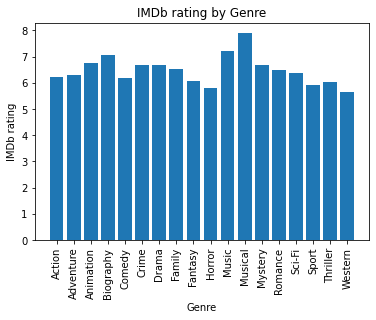

In [6]:
# Plot scores by genre bar graph
plt.bar(score_by_genre.index, score_by_genre.values)
plt.ylabel('IMDb rating')
plt.xlabel('Genre')
plt.title('IMDb rating by Genre')
plt.xticks(rotation=90)
plt.show()

In [9]:
# Boxplot function
def box_plot(df, column):
    # Template to get column values
    values_df = pd.DataFrame(df[column].value_counts())
    values_df = values_df.reset_index()
    column_values = values_df['index'].to_list()
    # Template to get scores of given column
    value_scores = []
    for value in column_values:
        value_df = df.loc[df[column]==value]
        value_score = value_df['score'].to_list()
        value_scores.append(value_score)
    # Template for box plot
    y_labels = column_values
    score_data = value_scores
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_title(f'Score by {column}', fontsize=20)
    ax.set_ylabel(f'{column}', fontsize=14)
    ax.set_xlabel('Scores', fontsize=14)
    ax.boxplot(score_data, labels = y_labels, vert=False)
    plt.gca().invert_yaxis()
    ax.grid()
    plt.show()

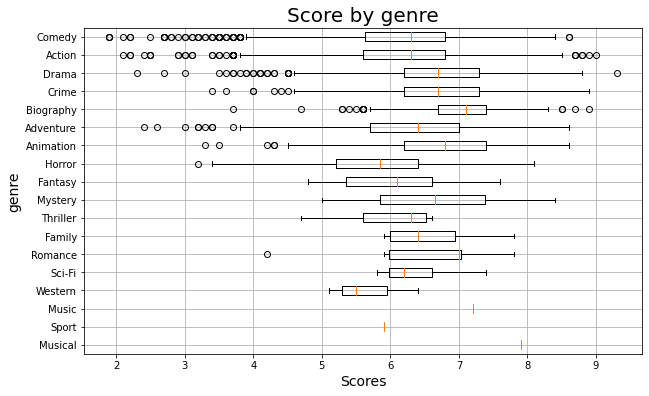

In [10]:
# Boxplot of score by genre
genre_bp = box_plot(movies_df,'genre')
genre_bp

In [8]:
# Get average IMDb score by year
score_by_year = movies_df.groupby(['year']).mean()['score']
score_by_year

year
1980    6.292500
1981    6.332039
1982    6.312712
1983    6.066142
1984    6.174839
1985    6.357627
1986    6.185165
1987    6.242473
1988    6.286387
1989    6.211828
1990    6.317989
1991    6.395897
1992    6.409524
1993    6.388205
1994    6.313636
1995    6.453061
1996    6.237374
1997    6.327551
1998    6.447938
1999    6.491192
2000    6.339896
2001    6.440102
2002    6.359000
2003    6.327919
2004    6.510553
2005    6.363000
2006    6.463819
2007    6.472864
2008    6.383417
2009    6.444500
2010    6.462944
2011    6.481407
2012    6.478894
2013    6.619000
2014    6.590000
2015    6.512755
2016    6.630653
2017    6.557286
2018    6.482915
2019    6.380000
2020    6.115385
Name: score, dtype: float64

In [9]:
# Get total number of movies by year
movies_by_year = movies_df.groupby(['year']).count()['name']
movies_by_year

year
1980     80
1981    103
1982    118
1983    127
1984    155
1985    177
1986    182
1987    186
1988    191
1989    186
1990    189
1991    195
1992    189
1993    195
1994    198
1995    196
1996    198
1997    196
1998    194
1999    193
2000    193
2001    197
2002    200
2003    197
2004    199
2005    200
2006    199
2007    199
2008    199
2009    200
2010    197
2011    199
2012    199
2013    200
2014    200
2015    196
2016    199
2017    199
2018    199
2019    180
2020     13
Name: name, dtype: int64

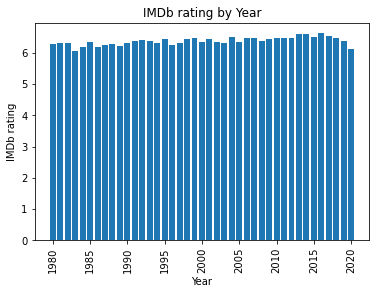

In [10]:
# Plot scores by year bar graph
plt.bar(score_by_year.index, score_by_year.values)
plt.ylabel('IMDb rating')
plt.xlabel('Year')
plt.title('IMDb rating by Year')
plt.xticks(rotation=90)
plt.show()

In [11]:
# Create dataframe with directors with more than 15 movies
directors_df = movies_df[movies_df['director'].map(movies_df['director'].value_counts()) > 15]
directors_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,gross,company,runtime
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,23402427.0,Chartoff-Winkler Productions,129.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,15795189.0,United Artists,100.0
14,Dressed to Kill,R,Crime,1980,"July 25, 1980 (United States)",7.1,37000.0,Brian De Palma,Brian De Palma,Michael Caine,United States,31899000.0,Filmways Pictures,104.0
38,Coal Miner's Daughter,PG,Biography,1980,"March 7, 1980 (United States)",7.5,17000.0,Michael Apted,Thomas Rickman,Sissy Spacek,United States,67182787.0,Universal Pictures,124.0
46,Stardust Memories,PG,Comedy,1980,"September 26, 1980 (United States)",7.3,22000.0,Woody Allen,Woody Allen,Woody Allen,United States,10389003.0,Jack Rollins & Charles H. Joffe Productions,89.0


In [12]:
# Get average IMDb score by director
score_by_director = directors_df.groupby(['director']).mean()['score']
score_by_director

director
Barry Levinson       6.485000
Brian De Palma       6.582353
Clint Eastwood       6.967742
Directors            6.496000
Garry Marshall       6.000000
Joel Schumacher      6.304545
Martin Scorsese      7.673684
Michael Apted        6.443750
Oliver Stone         6.850000
Richard Linklater    7.158824
Ridley Scott         6.926087
Rob Reiner           6.975000
Robert Zemeckis      7.241176
Ron Howard           6.825000
Sidney Lumet         6.452941
Spike Lee            6.747059
Stephen Frears       6.782353
Steven Soderbergh    6.678261
Steven Spielberg     7.440741
Tim Burton           6.984211
Tony Scott           6.793750
Walter Hill          6.300000
Wes Craven           6.031250
Woody Allen          6.973684
Name: score, dtype: float64

In [17]:
# Get total number of movies by director
movies_by_director = directors_df.groupby(['genre']).count()['name']
movies_by_director

genre
Action        85
Adventure     32
Animation     21
Biography     49
Comedy       137
Crime         65
Drama         79
Family         1
Fantasy        3
Horror        14
Mystery        2
Thriller       1
Name: name, dtype: int64

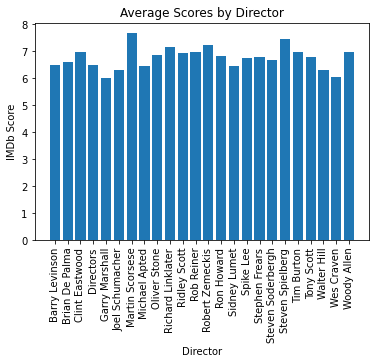

In [13]:
# Plot scores by director into bar graph
plt.bar(score_by_director.index, score_by_director.values)
plt.ylabel('IMDb Score')
plt.xlabel('Director')
plt.title('Average Scores by Director')
plt.xticks(rotation=90)
plt.show()

In [14]:
# Create dataframe with stars with more than 20 movies
stars_df = movies_df[movies_df['star'].map(movies_df['star'].value_counts()) > 20]
stars_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,gross,company,runtime
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,23402427.0,Chartoff-Winkler Productions,129.0
10,Any Which Way You Can,PG,Action,1980,"December 17, 1980 (United States)",6.1,18000.0,Buddy Van Horn,Stanford Sherman,Clint Eastwood,United States,70687344.0,The Malpaso Company,116.0
12,Popeye,PG,Adventure,1980,"December 12, 1980 (United States)",5.3,30000.0,Robert Altman,Jules Feiffer,Robin Williams,United States,49823037.0,Paramount Pictures,114.0
20,Cruising,R,Crime,1980,"February 15, 1980 (United States)",6.5,20000.0,William Friedkin,William Friedkin,Al Pacino,West Germany,19814523.0,Lorimar Film Entertainment,102.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,46918287.0,Paramount Pictures,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7313,The Beach Bum,R,Comedy,2019,"March 29, 2019 (United States)",5.5,20000.0,Harmony Korine,Harmony Korine,Matthew McConaughey,Switzerland,4554416.0,Iconoclast,95.0
7317,The Art of Racing in the Rain,PG,Comedy,2019,"August 9, 2019 (United States)",7.6,27000.0,Simon Curtis,Mark Bomback,Kevin Costner,United States,33766787.0,Fox 2000 Pictures,109.0
7404,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,426505244.0,Columbia Pictures,124.0
7406,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,245487753.0,Universal Pictures,101.0


In [19]:
# Get total number of movies by star
movies_by_star = stars_df.groupby(['star']).count()['name']
movies_by_star

star
Adam Sandler             28
Al Pacino                21
Anthony Hopkins          21
Arnold Schwarzenegger    27
Ben Affleck              22
Ben Stiller              27
Brad Pitt                24
Bruce Willis             34
Christian Bale           21
Clint Eastwood           23
Dennis Quaid             22
Denzel Washington        37
Dwayne Johnson           22
Eddie Murphy             27
Ethan Hawke              22
Harrison Ford            26
Jackie Chan              23
Jeff Bridges             27
Jim Carrey               22
John Cusack              24
John Travolta            30
Johnny Depp              33
Keanu Reeves             27
Kevin Costner            29
Liam Neeson              23
Mark Wahlberg            25
Matt Damon               25
Matthew McConaughey      25
Mel Gibson               29
Meryl Streep             25
Nicolas Cage             43
Richard Gere             24
Robert De Niro           41
Robert Downey Jr.        21
Robin Williams           27
Sandra Bullock 

In [15]:
# Get average IMDb score by director
score_by_star = stars_df.groupby(['star']).mean()['score']
score_by_star

star
Adam Sandler             6.150000
Al Pacino                6.966667
Anthony Hopkins          6.800000
Arnold Schwarzenegger    6.229630
Ben Affleck              6.322727
Ben Stiller              6.166667
Brad Pitt                7.050000
Bruce Willis             6.514706
Christian Bale           7.347619
Clint Eastwood           6.634783
Dennis Quaid             6.272727
Denzel Washington        6.908108
Dwayne Johnson           6.136364
Eddie Murphy             5.707407
Ethan Hawke              6.759091
Harrison Ford            6.803846
Jackie Chan              6.413043
Jeff Bridges             6.766667
Jim Carrey               6.759091
John Cusack              6.712500
John Travolta            5.820000
Johnny Depp              6.933333
Keanu Reeves             6.596296
Kevin Costner            6.889655
Liam Neeson              6.647826
Mark Wahlberg            6.492000
Matt Damon               6.764000
Matthew McConaughey      6.468000
Mel Gibson               6.813793
Meryl Str

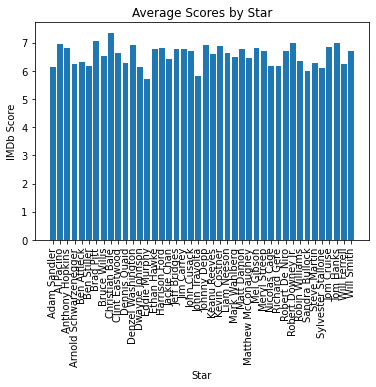

In [16]:
# Plot scores by star into bar graph
plt.bar(score_by_star.index, score_by_star.values)
plt.ylabel('IMDb Score')
plt.xlabel('Star')
plt.title('Average Scores by Star')
plt.xticks(rotation=90)
plt.show()